<a href="https://colab.research.google.com/github/synav/coursera-week-4-assignment--Datascience/blob/main/NavML_Leukemia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [18]:
local_zip = '/basezip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [19]:
base_dir = 'base dir'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation']

Contents of train directory:
['noall', 'all']

Contents of validation directory:
['noall', 'all']


In [20]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_all_dir = os.path.join(train_dir, 'all')
train_noall_dir = os.path.join(train_dir, 'noall')

# Directory with validation cat/dog pictures
validation_all_dir = os.path.join(validation_dir, 'all')
validation_noall_dir = os.path.join(validation_dir, 'noall')

In [21]:
train_all_fnames = os.listdir( train_all_dir )
train_noall_fnames = os.listdir( train_noall_dir )

print(train_all_fnames[:10])
print(train_noall_fnames[:10])

['Im015_1.jpg', 'Im031_1.jpg', 'Im001_1.jpg', 'Im012_1.jpg', 'Im008_1.jpg', 'Im021_1.jpg', 'Im007_1.jpg', 'Im022_1.jpg', 'Im004_1.jpg', 'Im051_1.jpg']
['Im094_0.jpg', 'Im039_0.jpg', 'Im076_0.jpg', 'Im072_0.jpg', 'Im044_0.jpg', 'Im040_0.jpg', 'Im087_0.jpg', 'Im074_0.jpg', 'Im068_0.jpg', 'Im079_0.jpg']


In [22]:
print('total training all images :', len(os.listdir(      train_all_dir ) ))
print('total training noall images :', len(os.listdir(      train_noall_dir ) ))

print('total validation all images :', len(os.listdir( validation_all_dir ) ))
print('total validation noall images :', len(os.listdir( validation_noall_dir ) ))

total training all images : 42
total training noall images : 52
total validation all images : 7
total validation noall images : 7


In [23]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

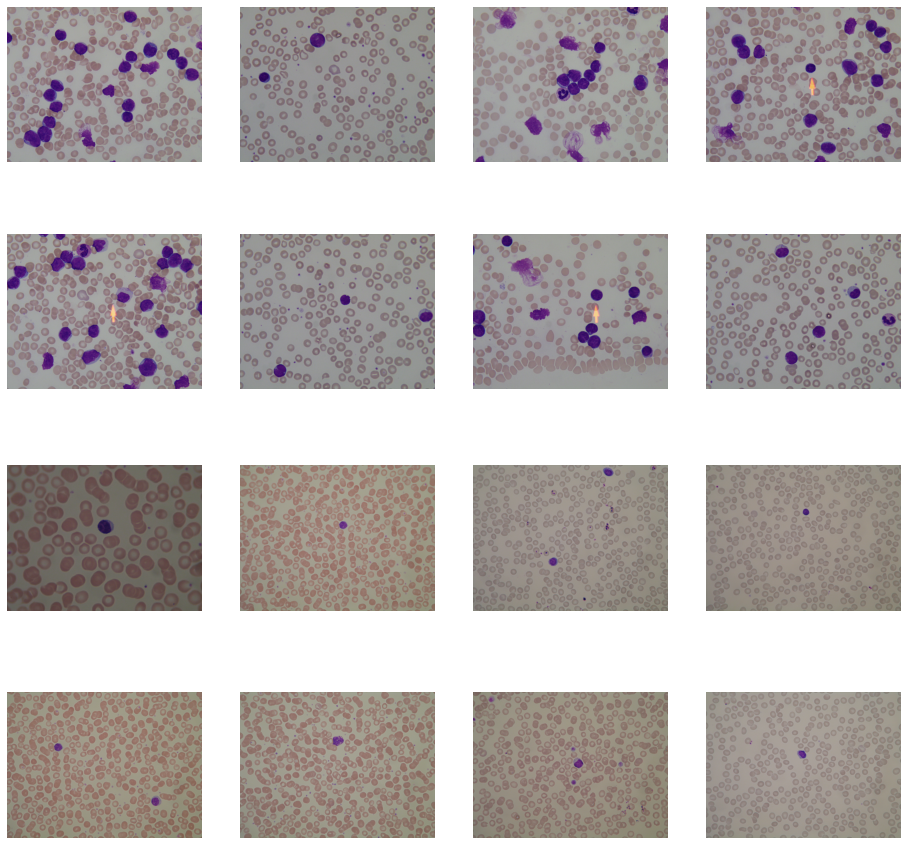

In [26]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_all_pix = [os.path.join(train_all_dir, fname) 
                for fname in train_all_fnames[ pic_index-8:pic_index] 
               ]

next_noall_pix = [os.path.join(train_noall_dir, fname) 
                for fname in train_noall_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_all_pix+next_noall_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [27]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [29]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=10,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 94 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [39]:
history = model.fit(
            train_generator,
            steps_per_epoch=10,
            epochs=10,
            validation_data=validation_generator,
            validation_steps=50,
            verbose=2
            )

Epoch 1/10
10/10 - 4s - loss: 0.3142 - accuracy: 0.8500 - val_loss: 0.0461 - val_accuracy: 1.0000 - 4s/epoch - 450ms/step
Epoch 2/10
10/10 - 2s - loss: 0.0076 - accuracy: 1.0000 - 2s/epoch - 161ms/step
Epoch 3/10
10/10 - 2s - loss: 0.3630 - accuracy: 0.9500 - 2s/epoch - 159ms/step
Epoch 4/10
10/10 - 2s - loss: 0.4640 - accuracy: 0.7500 - 2s/epoch - 159ms/step
Epoch 5/10
10/10 - 2s - loss: 0.1099 - accuracy: 0.9500 - 2s/epoch - 161ms/step
Epoch 6/10
10/10 - 2s - loss: 0.0194 - accuracy: 1.0000 - 2s/epoch - 160ms/step
Epoch 7/10
10/10 - 2s - loss: 0.4611 - accuracy: 0.8500 - 2s/epoch - 162ms/step
Epoch 8/10
10/10 - 2s - loss: 0.1695 - accuracy: 0.9500 - 2s/epoch - 171ms/step
Epoch 9/10
10/10 - 2s - loss: 0.5036 - accuracy: 0.9500 - 2s/epoch - 153ms/step
Epoch 10/10
10/10 - 1s - loss: 0.4277 - accuracy: 0.9000 - 1s/epoch - 143ms/step


In [40]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a ALL")
  else:
    print(fn + " is a NOT ALL")
 

Saving download (1).jpg to download (1) (2).jpg
Saving download.jpg to download (3).jpg
Saving Im016_1.jpg to Im016_1 (1).jpg
Saving normal-peripheral-blood-smear-n.jpg to normal-peripheral-blood-smear-n (1).jpg
Saving R.jpg to R (2).jpg
[7.087816e-16]
download (1).jpg is a NOT ALL
[1.734804e-10]
download.jpg is a NOT ALL
[3.7793838e-05]
Im016_1.jpg is a NOT ALL
[1.9048686e-07]
normal-peripheral-blood-smear-n.jpg is a NOT ALL
[6.0558284e-07]
R.jpg is a NOT ALL
